In [ ]:
import os
import json
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


In [26]:

# Fonction pour charger les données JSON
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Charger les fichiers JSON
condition = load_json('/users/eleves-a/2022/janis.aiad/3A/EAP1/HFT_QR_RL/HFT_QR_RL/data/smash2/data/dbn/condition.json')
manifest = load_json('/users/eleves-a/2022/janis.aiad/3A/EAP1/HFT_QR_RL/HFT_QR_RL/data/smash2/data/dbn/manifest.json')
metadata = load_json('/users/eleves-a/2022/janis.aiad/3A/EAP1/HFT_QR_RL/HFT_QR_RL/data/smash2/data/csv/metadata.json')

# Fonction pour charger les données CSV
def load_csv(stock):
    file_path = f'/users/eleves-a/2022/janis.aiad/3A/EAP1/HFT_QR_RL/HFT_QR_RL/data/smash2/data/csv/{stock}/20240624.csv'
    return pd.read_csv(file_path)

# Spécifier le stock
stock = 'RIOT'
data = load_csv(stock).sample(frac=0.025, random_state=1)

# Filtrer par publisher_id = 39
data = data[data['publisher_id'] == 39]

# Convertir ts_event en datetime
data['ts_event'] = pd.to_datetime(data['ts_event'], unit='ns')
data = data.sort_values(by='ts_event')

# Créer une figure avec Plotly
fig = go.Figure()

# Couleurs pour les tailles de la meilleure offre et demande
bid_colors = ['red', 'darkred', 'brown', 'firebrick', 'maroon', 'darkorange', 'orange', 'gold', 'yellow', 'black']
ask_colors = ['blue', 'darkblue', 'navy', 'royalblue', 'mediumblue', 'dodgerblue', 'deepskyblue', 'skyblue', 'lightblue', 'black']

# Tracer les tailles des meilleures offres avec une courbe claire pour suivre la couleur de l'offre
for i in range(10):
    bid_px_col = f'bid_px_0{i}'
    bid_sz_col = f'bid_sz_0{i}'
    fig.add_trace(go.Scatter(x=data['ts_event'], y=data[bid_px_col], mode='markers',
                             line=dict(color=bid_colors[i], width=2),
                             marker=dict(size=data[bid_sz_col]**0.5 / 2, color=bid_colors[i], opacity=0.5),
                             name=f'Best Bid Size {i}'))

# Tracer les tailles des meilleures demandes avec une courbe claire pour suivre la couleur de la demande
for i in range(10):
    ask_px_col = f'ask_px_0{i}'
    ask_sz_col = f'ask_sz_0{i}'
    fig.add_trace(go.Scatter(x=data['ts_event'], y=data[ask_px_col], mode='markers',
                             line=dict(color=ask_colors[i], width=2),
                             marker=dict(size=data[ask_sz_col]**0.5 / 2, color=ask_colors[i], opacity=0.5),
                             name=f'Best Ask Size {i}'))
# Tracer les courbes pour le prix de bid 00 et ask 00 avec des points de dispersion croissants dans le temps
fig.add_trace(go.Scatter(x=data['ts_event'], y=data['bid_px_00'], mode='lines+markers', name='Bid Price 00', line=dict(color='green', width=2), marker=dict(size=5)))
fig.add_trace(go.Scatter(x=data['ts_event'], y=data['ask_px_00'], mode='lines+markers', name='Ask Price 00', line=dict(color='purple', width=2), marker=dict(size=5)))
fig.add_trace(go.Scatter(x=data['ts_event'], y=data['price'], mode='lines+markers', name='Mid Price', line=dict(color='black', width=2), marker=dict(size=5)))

# Mettre à jour la mise en page
fig.update_layout(title=f"Mid Price, Best Bid Size, and Best Ask Size for {stock}", xaxis_title="Time", yaxis_title="Value")

# Afficher le graphique
fig.show()



In [27]:
data.head()


,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
24,2024-06-24 13:29:43.379541665+00:00,10,39,13724,C,A,0,9.26,3900,130,...,0,0,0,NaN,NaN,0,0,0,0,RIOT
56,2024-06-24 13:30:01.496337162+00:00,10,39,13724,A,B,0,9.15,200,130,...,0,0,0,NaN,NaN,0,0,0,0,RIOT
165,2024-06-24 13:30:03.141505857+00:00,10,39,13724,A,A,0,9.15,200,130,...,0,0,0,NaN,NaN,0,0,0,0,RIOT
218,2024-06-24 13:30:06.456490489+00:00,10,39,13724,C,B,0,9.13,100,130,...,0,0,0,NaN,NaN,0,0,0,0,RIOT
234,2024-06-24 13:30:07.285914349+00:00,10,39,13724,C,B,0,9.13,200,130,...,0,0,0,NaN,NaN,0,0,0,0,RIOT


In [28]:
import matplotlib.pyplot as plt
%matplotlib widget

ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

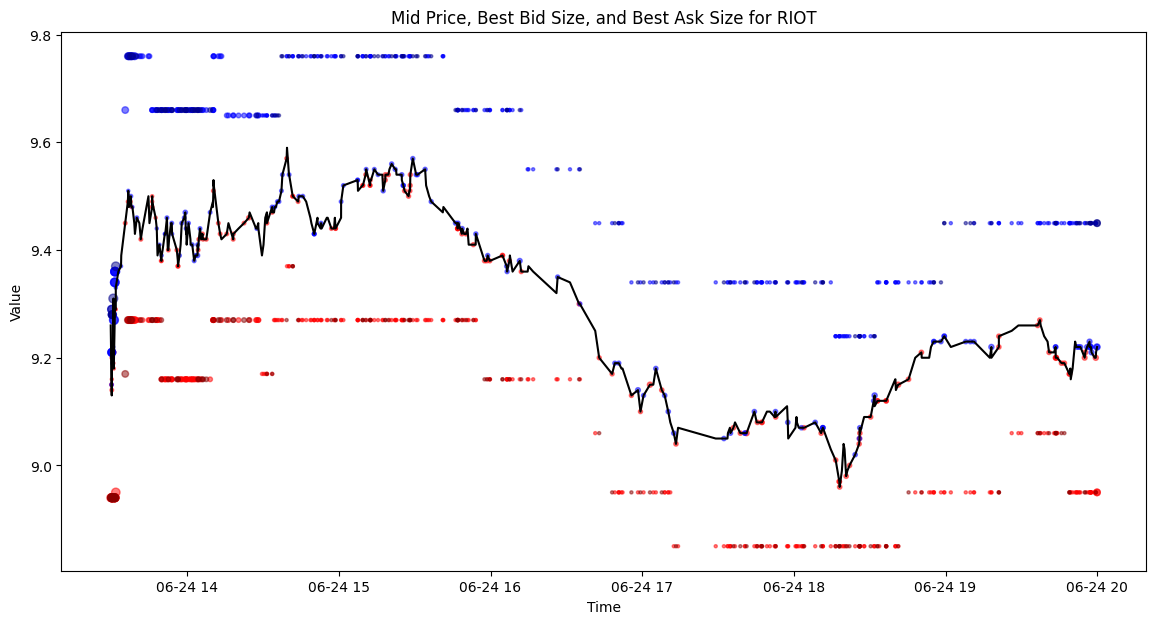

In [33]:
# Créer une figure avec Matplotlib
plt.figure(figsize=(14, 7))

# Tracer le prix moyen
plt.plot(data['ts_event'].sort_values(), data['price'], label='Mid Price', color='black')

# Tracer la taille des meilleures offres et demandes pour i de 0 à 9
for i in range(10):
    bid_px_col = f'bid_px_0{i}'
    bid_sz_col = f'bid_sz_0{i}'
    ask_px_col = f'ask_px_0{i}'
    ask_sz_col = f'ask_sz_0{i}'
    
    # Tracer la taille de la meilleure offre
    plt.scatter(data['ts_event'], data[bid_px_col], s=data[bid_sz_col]**0.5 / 2, c=bid_colors[i], alpha=0.5, label=f'Best Bid Size {i}')
    
    # Tracer la taille de la meilleure demande
    plt.scatter(data['ts_event'], data[ask_px_col], s=data[ask_sz_col]**0.5 / 2, c=ask_colors[i], alpha=0.5, label=f'Best Ask Size {i}')

# Mettre à jour la mise en page
plt.title(f"Mid Price, Best Bid Size, and Best Ask Size for {stock}")
plt.xlabel("Time")
plt.ylabel("Value")

# Afficher le graphique
plt.show()

In [34]:
import numpy as np


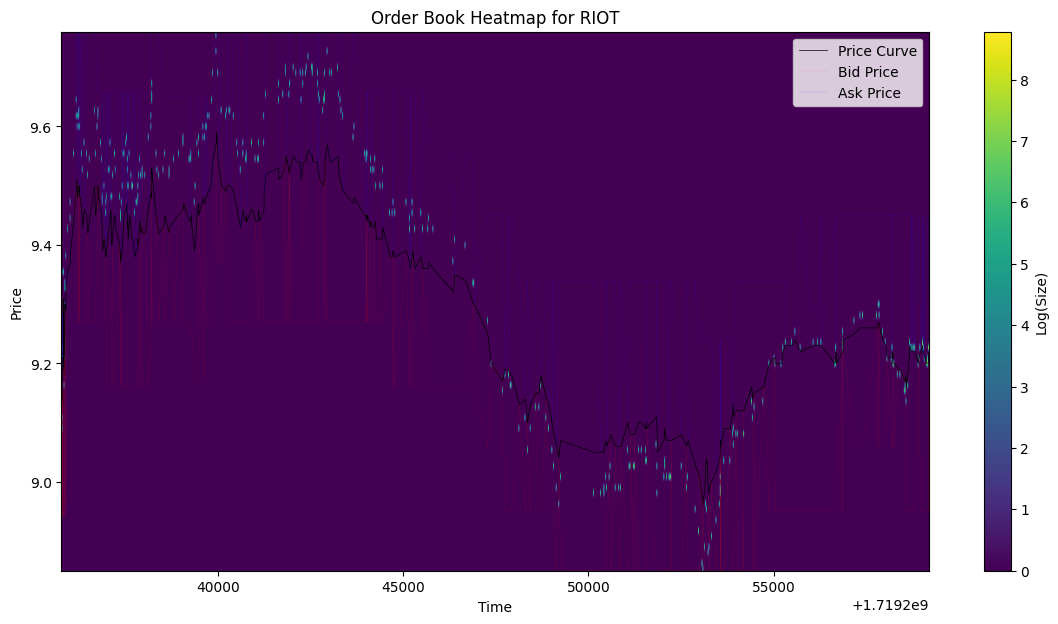

In [39]:
# Supprimer les valeurs NaN des colonnes 'ts_event' et 'price'
data_clean = data.dropna(subset=['ts_event', 'price'])

# Créer une figure avec Matplotlib
plt.figure(figsize=(14, 7))

# Définir les limites de l'axe des prix
price_min = data_clean[['bid_px_00', 'ask_px_00']].min().min()
price_max = data_clean[['bid_px_00', 'ask_px_00']].max().max()

# Créer une matrice de zéros pour stocker les densités
time_bins = 1000
price_bins = 100
heatmap, xedges, yedges = np.histogram2d(data_clean['ts_event'].astype(np.int64) // 10**9, data_clean['price'], bins=[time_bins, price_bins], weights=data_clean['size'])

# Appliquer une échelle logarithmique aux valeurs du heatmap
heatmap_log = np.log1p(heatmap)

# Afficher le heatmap avec une échelle logarithmique
plt.imshow(heatmap_log.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], price_min, price_max], cmap='viridis')

# Tracer la courbe des prix en noir (très fin)
plt.plot(data_clean['ts_event'].astype(np.int64) // 10**9, data_clean['price'], color='black', linewidth=0.5, label='Price Curve')

# Tracer la courbe des prix bid en rouge (très fin)
plt.plot(data_clean['ts_event'].astype(np.int64) // 10**9, data_clean['bid_px_00'], color='red', linewidth=0.05, label='Bid Price')

# Tracer la courbe des prix ask en bleu (très fin)
plt.plot(data_clean['ts_event'].astype(np.int64) // 10**9, data_clean['ask_px_00'], color='blue', linewidth=0.05, label='Ask Price')

# Mettre à jour la mise en page
plt.title(f"Order Book Heatmap for {stock}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.colorbar(label='Log(Size)')
plt.legend()

# Sauvegarder le graphique
plt.savefig(f'order_book_heatmap_{stock}.png')

# Afficher le graphique
plt.show()
